# Inference Pipeline for Chessman Image Classification
-----------------------------------------------------


In [ ]:

# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input


In [ ]:

# Load the Best Trained Model
model = load_model('best_mobilenet_model.keras')

# Load Class Labels
# Assuming the class labels were obtained from the training data generator
class_labels = {0: "Bishop", 1: "King", 2: "Knight", 3: "Pawn", 4: "Queen", 5: "Rook"}  # Update based on your dataset


# Helper Function: Preprocess Image for Inference
def preprocess_image(img_path):
    """Preprocesses an image for the MobileNet model.
    
    Args:
        img_path (str): Path to the image file.
    
    Returns:
        np.array: Preprocessed image ready for prediction.
    """
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Use MobileNet's preprocessing
    return img_array

# Helper Function: Make Predictions
def make_prediction(img_path):
    """Makes a prediction on the input image.
    
    Args:
        img_path (str): Path to the image file.
    
    Returns:
        str: Predicted class label with confidence score.
    """
    # Preprocess the image
    img_array = preprocess_image(img_path)
    
    # Make the prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    confidence_score = np.max(predictions)
    
    # Get the class label
    predicted_label = class_labels[predicted_class_index]
    
    return predicted_label, confidence_score


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: Queen with Confidence: 0.84


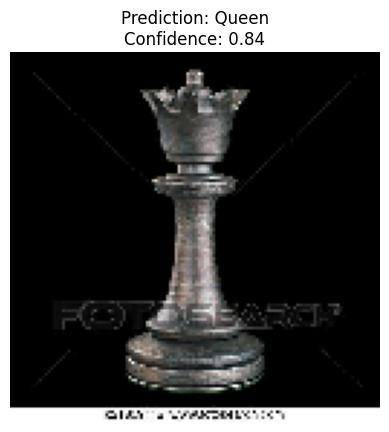

In [12]:

# Inference Example
# -----------------------------------------------------
# Test the pipeline with an image
test_image_path = "/Users/m1pro/Downloads/Chess/Queen/00000015.jpg" 

predicted_label, confidence = make_prediction(test_image_path)
print(f"Predicted Class: {predicted_label} with Confidence: {confidence:.2f}")

# Visualize the Image and Prediction
img = image.load_img(test_image_path, target_size=(128, 128))
plt.imshow(img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}")
plt.axis('off')
plt.show()
